In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from functions import getSpectralData
import pickle
%matplotlib widget


In [2]:
pathologySampleRate, pathologySignal = wav.read("./ALS/Pathology/008.wav")

/var/folders/7h/0531s09j3m319qxy3xrn3nt00000gn/T/ipykernel_15050/2747045695.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  pathologySampleRate, pathologySignal = wav.read("./ALS/Pathology/008.wav")


In [3]:
controlSampleRate, controlSignal = wav.read("./ALS/Control/002.wav")
controlSampleRate

/var/folders/7h/0531s09j3m319qxy3xrn3nt00000gn/T/ipykernel_15050/3295730258.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  controlSampleRate, controlSignal = wav.read("./ALS/Control/002.wav")


44100

/Users/yaminmahomedyassin/Desktop/Projeto/Algoritmo/functions.py:65: RuntimeWarning: divide by zero encountered in log10
  fft_magnitudes = 10* np.log10(np.abs(fft_frame))


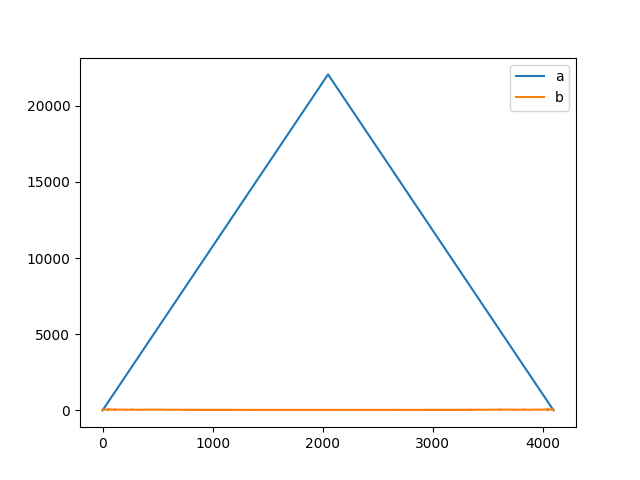

In [4]:
frameSize = 1323
stepSize = 441

pathologyData = getSpectralData(signal=pathologySignal, frameSize=frameSize, stepSize=stepSize, sampleRate=pathologySampleRate)
heathyData = getSpectralData(signal=controlSignal, frameSize=frameSize, stepSize=stepSize, sampleRate=controlSampleRate)
PD = {
        "a": [],
        "b": [],
    }
HD = {
        "a": [],
        "b": [],
    }

HD["a"] = heathyData["fft_frequencies"][0]
HD["b"] = heathyData["fft_magnitudes"][0]

PD["a"] = pathologyData["fft_frequencies"][0]
PD["b"] = pathologyData["fft_magnitudes"][0]

with open('sickData.pickle', 'wb') as f:
    pickle.dump(PD, f)

with open('healthyData.pickle', 'wb') as f:
    pickle.dump(HD, f)

#visualize sickData.pickle using pandas
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('sickData.pickle', 'rb') as f:
    data = pickle.load(f)

    df = pd.DataFrame(data)
    df.plot()
    plt.show()
    


(0.0, 80.0)

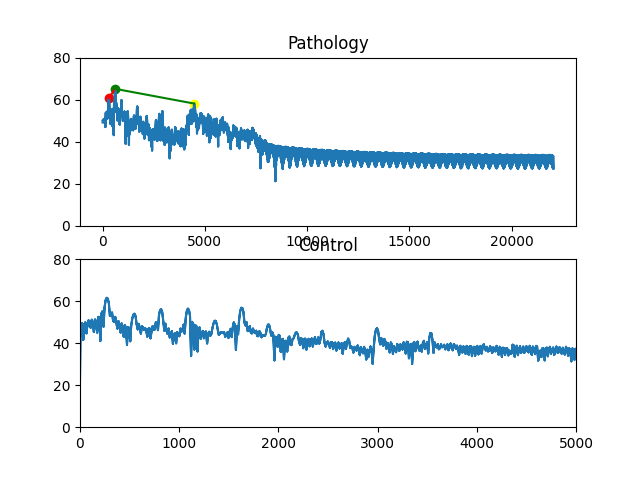

In [7]:
#subplots for pathology and control
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, sharey=False)

#plot pathology
ax1.plot(pathologyData["fft_frequencies"][0], pathologyData["fft_magnitudes"][0])

ax1.scatter(pathologyData["spectral_data"]["fbme"][0]["x"], pathologyData["spectral_data"]["fbme"][0]["y"], color="red")
ax1.scatter(pathologyData["spectral_data"]["sbme"][0]["x"], pathologyData["spectral_data"]["sbme"][0]["y"], color="green")
ax1.scatter(pathologyData["spectral_data"]["tbme"][0]["x"], pathologyData["spectral_data"]["tbme"][0]["y"], color="yellow")
ax1.plot([pathologyData["spectral_data"]["fbme"][0]["x"], pathologyData["spectral_data"]["sbme"][0]["x"]], [pathologyData["spectral_data"]["fbme"][0]["y"], pathologyData["spectral_data"]["sbme"][0]["y"]], color="red")
ax1.plot([pathologyData["spectral_data"]["sbme"][0]["x"], pathologyData["spectral_data"]["tbme"][0]["x"]], [pathologyData["spectral_data"]["sbme"][0]["y"], pathologyData["spectral_data"]["tbme"][0]["y"]], color="green")

ax1.set_title("Pathology")

ax1.set_ylim(0, 80)


#plot control
ax2.plot(heathyData["fft_frequencies"][0], heathyData["fft_magnitudes"][0])
""" ax2.scatter(heathyData["spectral_data"]["fbme"][0]["x"], heathyData["spectral_data"]["fbme"][0]["y"], color="red")
ax2.scatter(heathyData["spectral_data"]["sbme"][0]["x"], heathyData["spectral_data"]["sbme"][0]["y"], color="green")
ax2.scatter(heathyData["spectral_data"]["tbme"][0]["x"], heathyData["spectral_data"]["tbme"][0]["y"], color="yellow")
ax2.plot([heathyData["spectral_data"]["fbme"][0]["x"], heathyData["spectral_data"]["sbme"][0]["x"]], [heathyData["spectral_data"]["fbme"][0]["y"], heathyData["spectral_data"]["sbme"][0]["y"]], color="red")
ax2.plot([heathyData["spectral_data"]["sbme"][0]["x"], heathyData["spectral_data"]["tbme"][0]["x"]], [heathyData["spectral_data"]["sbme"][0]["y"], heathyData["spectral_data"]["tbme"][0]["y"]], color="green")
 """
ax2.set_title("Control")
ax2.set_xlim(0, 5000)
ax2.set_ylim(0, 80)




In [6]:
print(np.unique(pathologyData["fft_magnitudes"][0]))

[21.12181809 26.89637232 26.97229343 ... 63.90007409 64.77058973
 65.13212564]


In [10]:
print(pathologyData["spectral_data"]["fbme"][0]["x"]) 
print(pathologyData["spectral_data"]["fbme"][0]["y"])
print(pathologyData["spectral_data"]["sbme"][0]["x"])
print(pathologyData["spectral_data"]["sbme"][0]["y"])
print(pathologyData["spectral_data"]["tbme"][0]["x"])
print(pathologyData["spectral_data"]["tbme"][0]["y"])

312.2314453125
60.75217832759484
613.6962890625
65.13212564382358
4478.90625
58.10895220057856
